In [2]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
from torchsummary import summary
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [5]:
# 1. 데이터 로딩 및 전처리
url = "https://raw.githubusercontent.com/Yana-one/AI_class/refs/heads/main/week6/diabetes.csv"
data = pd.read_csv(url)
print("✅ 데이터 로딩 완료")
data

✅ 데이터 로딩 완료


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
# 데이터와 타겟 분리
X = data.drop(['BMI','Outcome'], axis=1).values
y = data['BMI'].values

In [11]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, 

((614, 7), (154, 7), (614,), (154,))

In [15]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [17]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 7), (154, 7), (614,), (154,))

In [21]:
class DiabetesDense(nn.Module):
    def __init__(self):
        super(DiabetesDense, self).__init__()
        self.fc1 = nn.Linear(7, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)  
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model, loss function, and optimizer
model = DiabetesDense()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [23]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [25]:
model.train()
for epoch in range(50):
    total_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        output = model(X_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss / len(train_loader):.4f}")

Epoch 1, Loss: 1118.2285
Epoch 2, Loss: 1032.0939
Epoch 3, Loss: 961.5427
Epoch 4, Loss: 832.3378
Epoch 5, Loss: 642.7339
Epoch 6, Loss: 429.4667
Epoch 7, Loss: 231.2570
Epoch 8, Loss: 127.5808
Epoch 9, Loss: 94.3003
Epoch 10, Loss: 86.0966
Epoch 11, Loss: 81.0495
Epoch 12, Loss: 78.5647
Epoch 13, Loss: 73.8514
Epoch 14, Loss: 70.6778
Epoch 15, Loss: 69.5920
Epoch 16, Loss: 67.8096
Epoch 17, Loss: 67.7030
Epoch 18, Loss: 69.7744
Epoch 19, Loss: 68.1921
Epoch 20, Loss: 63.8640
Epoch 21, Loss: 60.0739
Epoch 22, Loss: 57.8968
Epoch 23, Loss: 57.6464
Epoch 24, Loss: 55.9032
Epoch 25, Loss: 55.4042
Epoch 26, Loss: 55.4719
Epoch 27, Loss: 53.1561
Epoch 28, Loss: 52.2819
Epoch 29, Loss: 51.3613
Epoch 30, Loss: 50.4919
Epoch 31, Loss: 52.9992
Epoch 32, Loss: 49.2089
Epoch 33, Loss: 48.3994
Epoch 34, Loss: 48.3687
Epoch 35, Loss: 48.5197
Epoch 36, Loss: 49.1993
Epoch 37, Loss: 46.0745
Epoch 38, Loss: 47.3704
Epoch 39, Loss: 45.1169
Epoch 40, Loss: 45.3997
Epoch 41, Loss: 44.8872
Epoch 42, Loss:

In [27]:
model.eval()
preds, actuals = [], []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        outputs = model(X_batch).cpu().numpy()
        preds.extend(outputs)
        actuals.extend(y_batch.numpy())

mse = mean_squared_error(actuals, preds)
print(f"Test MSE: {mse:.4f}")

Test MSE: 53.4884


In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

actuals = np.array(actuals).flatten()
preds = np.array(preds).flatten()

print("Evaluation Metrics for Regression")
print(f"MAE: {mean_absolute_error(actuals, preds):.2f}")
print(f"MSE: {mean_squared_error(actuals, preds):.2f}")
print(f"R² Score: {r2_score(actuals, preds):.2f}")

Evaluation Metrics for Regression
MAE: 5.11
MSE: 53.49
R² Score: 0.10


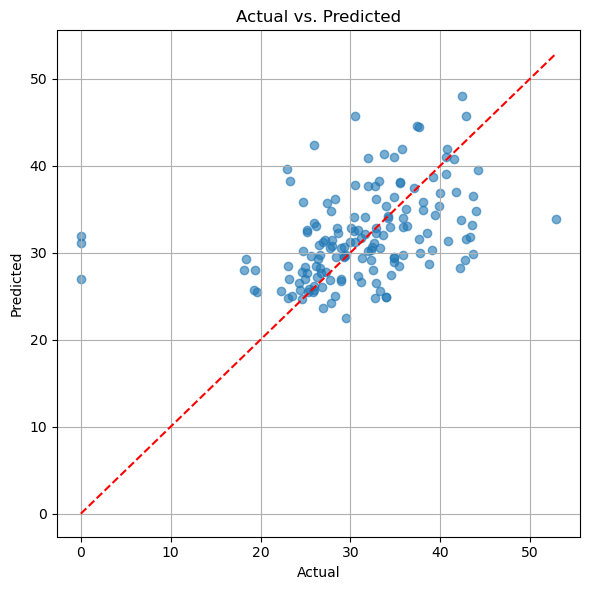

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(actuals, preds, alpha=0.6)
plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], 'r--')  # 대각선 기준선
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()